# **Predicting Annual Medical Insurance Costs - LR and SVM**
Authors: Christian Bammann, Ryan Monroe

December 2025


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/insurance.csv') # Medical Insurance Cost Dataset
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
df['charges'] = np.log(df['charges']) # Make target more stable for regression
df_encoded = pd.get_dummies(df, drop_first=True) # Fully numeric dataset

X = df_encoded.drop('charges', axis=1).values
Y = df_encoded['charges'].values

In [ ]:
df_encoded.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,9.734176,False,True,False,False,True
1,18,33.77,1,7.453302,True,False,False,True,False
2,28,33.00,3,8.400538,True,False,False,True,False


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0) # 80/20 split

In [ ]:
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 1070
Test samples: 268


In [ ]:
scaler = StandardScaler() # Create scaler object
X_train = scaler.fit_transform(X_train) # Fit to training data and transform
X_test  = scaler.transform(X_test) # Transform test data using same scaler

print("Train mean (first 5):", X_train.mean(axis=0)[:5])
print("Train std  (first 5):", X_train.std(axis=0, ddof=0)[:5])

Train mean (first 5): [-1.07961407e-16  4.84202502e-15 -5.11532665e-17 -3.61081881e-17
 -8.84028053e-17]
Train std  (first 5): [1. 1. 1. 1. 1.]


###**Linear Regression Model**

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
# Linear Regression Metrics
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 0.17610858591576037
Mean Absolute Error: 0.2633659771271826
R² Score: 0.7902892331096649


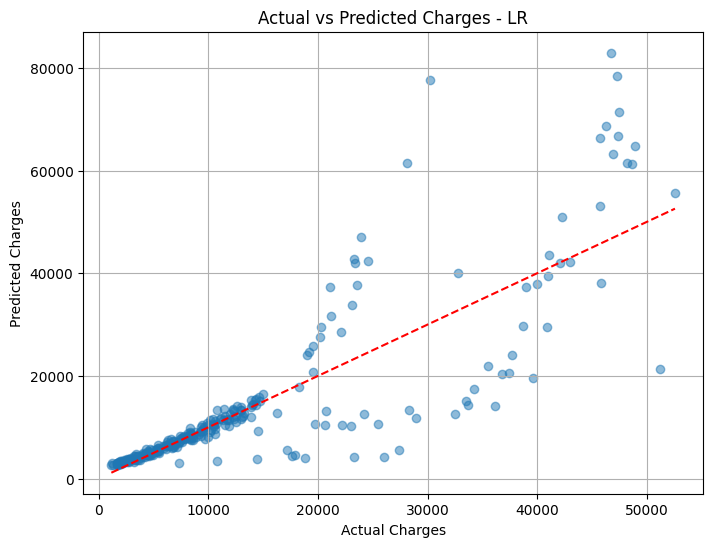

In [ ]:
Y_pred_actual = np.exp(Y_pred)
Y_test_actual = np.exp(Y_test)

plt.figure(figsize=(8,6))
plt.scatter(Y_test_actual, Y_pred_actual, alpha=0.5)
plt.plot([Y_test_actual.min(), Y_test_actual.max()],
         [Y_test_actual.min(), Y_test_actual.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - LR')
plt.grid(True)
plt.show()

### **Support Vector Machine (SVM)**

In [ ]:
model = SVR(kernel='rbf')  # linear, poly, rbf. rbf performs best
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
# SVM Metrics
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 0.1073387031154736
Mean Absolute Error: 0.1562634766325573
R² Score: 0.8721806683626009


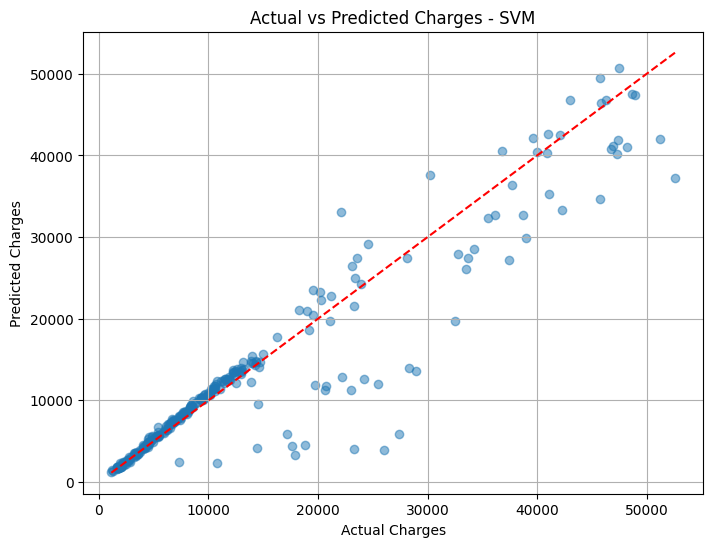

In [ ]:
Y_pred_actual = np.exp(Y_pred)
Y_test_actual = np.exp(Y_test)

plt.figure(figsize=(8,6))
plt.scatter(Y_test_actual, Y_pred_actual, alpha=0.5)
plt.plot([Y_test_actual.min(), Y_test_actual.max()],
         [Y_test_actual.min(), Y_test_actual.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges - SVM')
plt.grid(True)
plt.show()